# Naive Bayes with TF-IDF:

# [Term Frequency Inverse Document Frequency]

Naive Bayes is a Machine Learning method you can use to predict the likelihood that an event will occur given evidence that's present in your data.

Naive Bayes Model:

     Multinomial NB :- good for when your features describe discreate frequency counts. (e.g. word counts for text classification)
     
     The Multinomial distribution normally requires integer feature counts. but fractional counts such as tf-idf may also work.
       

.> A classification technique based on Bayes;s Theorem

.> Bayes' theorem is based on conditional probability. The conditional probability helps us calculating the probability that something will happen,given that something else has already happened.

                                P(A/B)=P(B/A)P(A)/P(B)

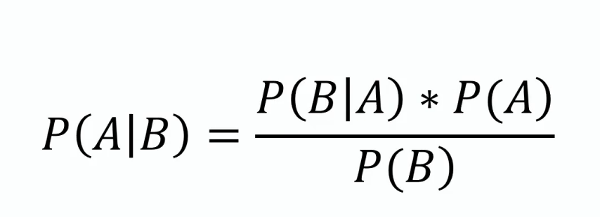

In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [2]:
df=pd.read_csv('sms_spam.csv')

In [3]:
df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


# TfidVectorizer:

In [4]:
#mapping of type column
df['type']=df.type.map({'ham':0,'spam':1})
df

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [5]:
x=df.text   # input
y=df.type   #output

In [6]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [7]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: type, dtype: int64

In [8]:
x.shape

(5574,)

In [9]:
y.shape

(5574,)

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=10)

In [11]:
x_train

192     I'm sorry. I've joined the league of people th...
4663                    Ladies first and genus second k .
4101                             I not at home now lei...
4494    LOL .. *grins* .. I'm not babe, but thanks for...
1303    FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...
                              ...                        
1180                  To day class is there are no class.
3441                       What time you thinkin of goin?
1344    Crazy ar he's married. Ü like gd looking guys ...
4623                They finally came to fix the ceiling.
1289                             Happy new year to u too!
Name: text, Length: 4459, dtype: object

In [12]:
x_test

1925                                                   Ok
4520    Just got part Nottingham - 3 hrs 63miles. Good...
1178                           Just nw i came to hme da..
3073                               Ok lor... But buy wat?
1058                                 Ard 515 like dat. Y?
                              ...                        
3393                      What r u cooking me for dinner?
2243    Nope wif my sis lor... Aft bathing my dog then...
3106                           Or remind me in a few hrs.
1882                               Ok.. Ü finishing soon?
4411                 You also didnt get na hi hi hi hi hi
Name: text, Length: 1115, dtype: object

In [13]:
   x_train.shape      

(4459,)

In [14]:
x_test.shape

(1115,)

In [15]:
from  sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer()          

In [16]:
# TfidVectorizer() library used to converts text into float form 
# CountVectorizer() library used to convert text into numeric form.

#CountVectorizer() counts only words
#TfidVectorizer() counts word and also obtain important words score.

In [17]:
# toarray() used to convert data in array form

cv_train = cv.fit_transform(x_train).toarray()
cv_test = cv.transform(x_test).toarray()

In [18]:
cv_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
cv_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
nb=MultinomialNB()
nb.fit(cv_train,y_train)

MultinomialNB()

In [21]:
y_pred=nb.predict(cv_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9650224215246637

In [23]:
print('Wrong Predictions out of total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

Wrong Predictions out of total:
39 / 1115


In [24]:
# Missclassified
import numpy as np
np.where(y_pred!=y_test)

(array([  10,   52,   60,   62,  139,  141,  181,  234,  267,  272,  282,
         372,  400,  403,  425,  436,  494,  516,  545,  567,  578,  580,
         582,  596,  617,  705,  712,  725,  730,  751,  813,  859,  864,
         906,  961,  994, 1028, 1047, 1072], dtype=int64),)

In [25]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[989,   0],
       [ 39,  87]], dtype=int64)

In [26]:
#plot

In [27]:
import seaborn as sb
import matplotlib.pyplot as plt

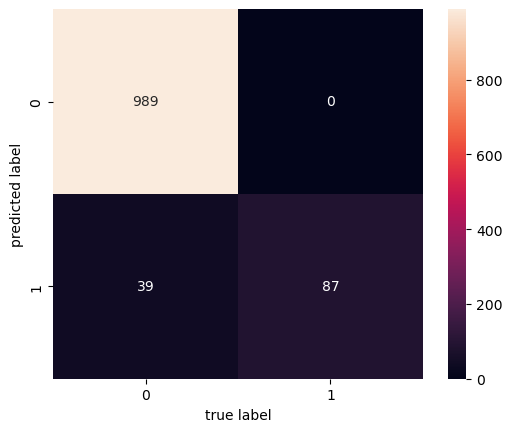

In [28]:
sb.heatmap(cm,annot=True,cbar=True,square=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [29]:
#underfit or overfit (to find this we calculate both accuracy)
#overfit= training accuracy best(above 90%) and testing wrong(below 60%)
#underfit= both accuracy down

In [30]:
print(nb.score(cv_train,y_train))
print(nb.score(cv_test,y_test))        #no overfit & no underfit

0.9744337295357703
0.9650224215246637


# CountVectorizer:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv=CountVectorizer()

In [33]:
#toarray()
cv_train = cv.fit_transform(x_train).toarray()
cv_test = cv.transform(x_test).toarray()

In [34]:
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
cv_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
nb=MultinomialNB()
nb.fit(cv_train,y_train)

MultinomialNB()

In [37]:
y_pred=nb.predict(cv_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9865470852017937

In [39]:
print('Wrong Prediction out of total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

Wrong Prediction out of total:
15 / 1115


In [40]:
import numpy as np
np.where(y_pred!=y_test)

(array([ 10,  60,  91, 139, 234, 272, 403, 425, 577, 580, 596, 617, 705,
        730, 961], dtype=int64),)

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[987,   2],
       [ 13, 113]], dtype=int64)

In [42]:
import seaborn as sb
import matplotlib.pyplot as plt

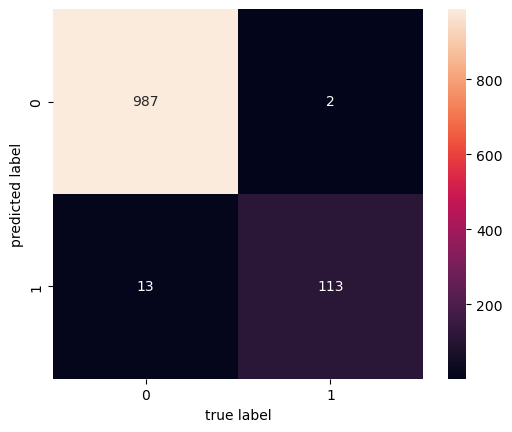

In [44]:
sb.heatmap(cm,annot=True,cbar=True,square=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [45]:
print(nb.score(cv_train,y_train))
print(nb.score(cv_test,y_test))

0.9934962996187486
0.9865470852017937


# Feature Extraction:

In [51]:
test=['hi john where are you going','hello john','how are you','i am going python']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [53]:
cv=CountVectorizer()
x_new=cv.fit_transform(test).toarray()
x_new

array([[0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [54]:
x=pd.DataFrame(x_new,columns=cv.get_feature_names())
x

,am,are,going,hello,hi,how,john,python,where,you
0,0,1,1,0,1,0,1,0,1,1
1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0
